# Linear Regression

## Assumptions
1. Linear in parameters: in the population, the relationship between y/dependent & the explanatory/independent variables is linear
2. Random Sampling: the data is a random sample drawn from the population.  
3. No Perfect Colinearity: in the sample, and therefore the population, none of the independent variables are constant and there are no exact relationships between any two independent variables
4. Zero Conditional Mean: the value of the explanatory/independent variables must not contain any information about the mean of the ubobserved factors (ex: endogenous variables)
\begin{equation*}
E(u_i|x_i) =  0
\end{equation*}
5. Heteroskedasticity 
6. The coeficients are normally distributed

Variance
\begin{equation*}
Var(\hat B_j) = \frac{\hat\sigma^2}{\sum_{j=1}^n (x_j - \bar x)^2 * (1-R_j^2)}
\end{equation*}
Standard Error
\begin{equation*}
se(\hat B_j) = \sqrt{Var(\hat B_j)}
\end{equation*}

T-Statistic
\begin{equation*}
t_\hat B = \frac{\hat B_j - B_j}{se(\hat B_j)}
\end{equation*}

One Sided T-Test
\begin{equation*}
H_0 : B_j = 0
\end{equation*}
\begin{equation*}
H_1 : B_j > 0
\end{equation*}

Two Sided T-Test
\begin{equation*}
H_0 : B_j = 0
\end{equation*}
\begin{equation*}
H_1 : B_j \neq 0
\end{equation*}

# Dataset

In [13]:
# Plotting Tools
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

import seaborn as sns

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [6]:
X = boston.data
y = boston.target

In [20]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Distribution of Dependent Variable

C:\Users\ajwilson\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


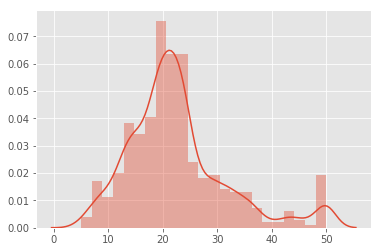

In [15]:
sns.distplot(y)
plt.show()

### Distribution of Independent Variables

In [7]:
X.shape

(506, 13)

CRIM


C:\Users\ajwilson\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


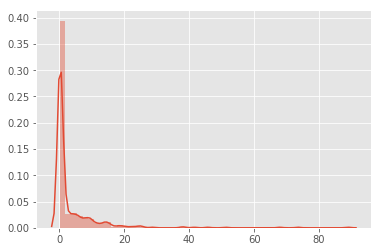

ZN


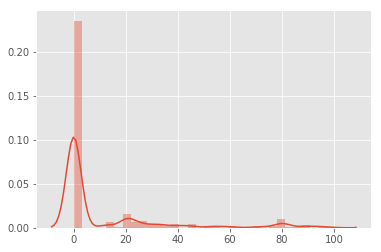

INDUS


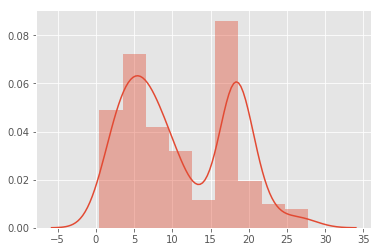

CHAS


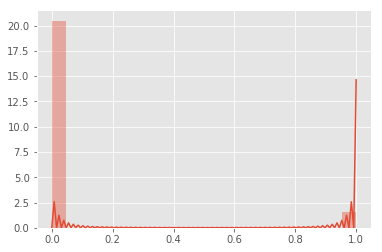

NOX


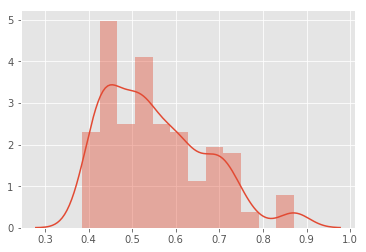

RM


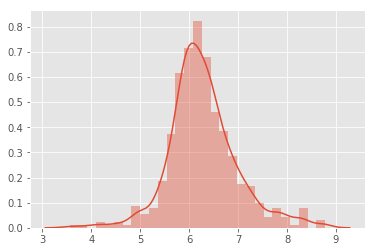

AGE


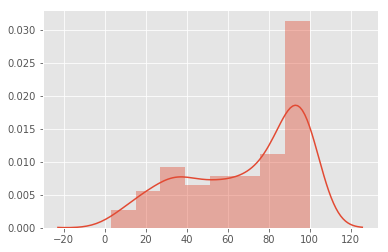

DIS


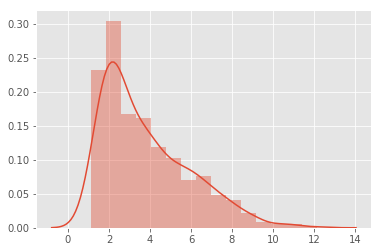

RAD


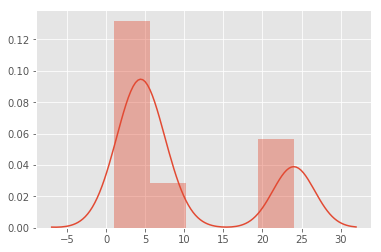

TAX


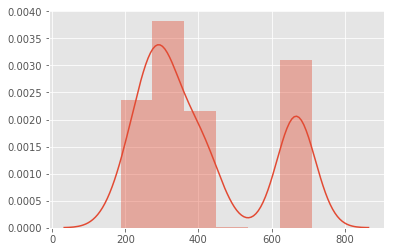

PTRATIO


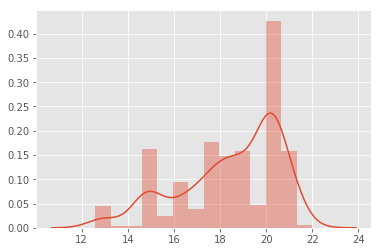

B


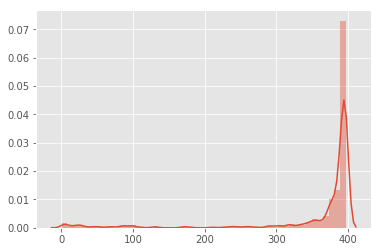

LSTAT


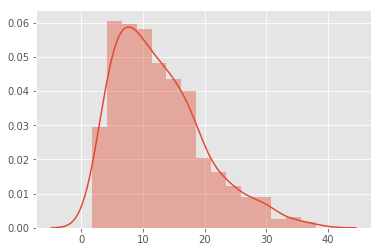

In [24]:
for i in range(X.shape[1]):
    print(boston.feature_names[i])
    sns.distplot(X[:,i])
    plt.show()